In [1]:
import sys

import numpy as np
import pandas as pd

from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt

sys.path.append("..")
from utils import create_onedrive_directdownload

plt.style.use("fivethirtyeight")

In [2]:
onedrive_url = "https://1drv.ms/u/s!AiqdXCxPTydhofYbhA1ASJ6RZ3OjTw?e=Ie9x4h"
converted_url = create_onedrive_directdownload(onedrive_url)
df = pd.read_csv(converted_url, index_col="Month", parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


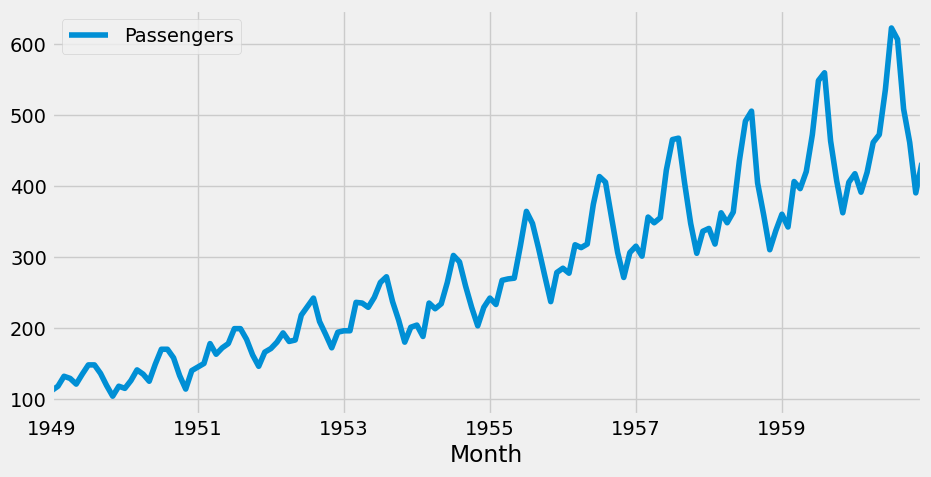

In [3]:
# this dataset has trend and seasonality
df.plot(figsize=(10, 5));

In [4]:
# first 2 return values are test-statistic and p-value
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
adfuller(df["Passengers"])

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [5]:
def adf(x):
    res = adfuller(x)
    print(f"Test-Statistics: {res[0]}")
    print(f"P-Value: {res[1]}")
    if res[1] < 0.05:
        print("Stationary.")
    else:
        print("Non-stationary.")

In [6]:
adf(df["Passengers"])

Test-Statistics: 0.8153688792060482
P-Value: 0.991880243437641
Non-stationary.


In [7]:
adf(np.random.randn(100))

Test-Statistics: -9.034658337514577
P-Value: 5.329364872084293e-15
Stationary.


In [8]:
adf(np.random.gamma(1, 1, 100))

Test-Statistics: -10.447472203938638
P-Value: 1.4673550346871987e-18
Stationary.


In [9]:
df["LogPassengers"] = np.log(df["Passengers"])

adf(df["LogPassengers"])

Test-Statistics: -1.7170170891069607
P-Value: 0.42236677477039125
Non-stationary.


In [10]:
df["Diff"] = df["Passengers"].diff()

adf(df["Diff"].dropna())

Test-Statistics: -2.8292668241699994
P-Value: 0.0542132902838255
Non-stationary.


<AxesSubplot: xlabel='Month'>

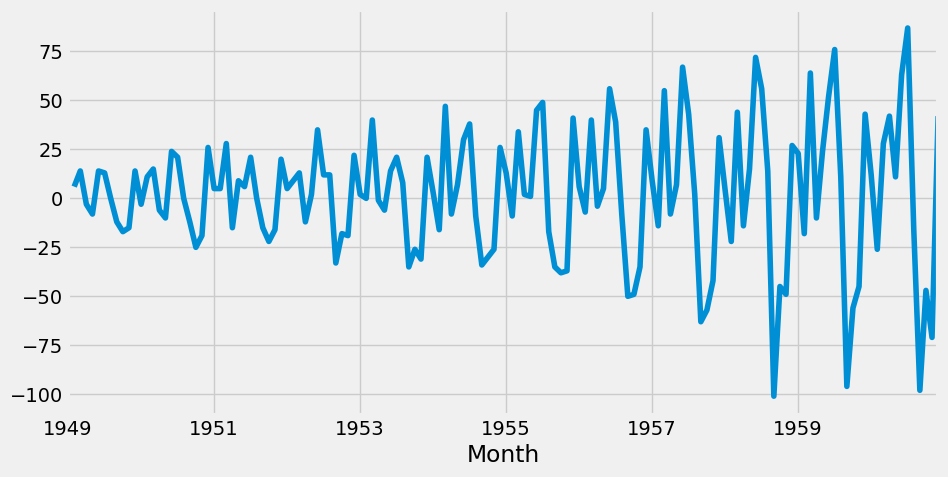

In [11]:
df["Diff"].plot(figsize=(10, 5))

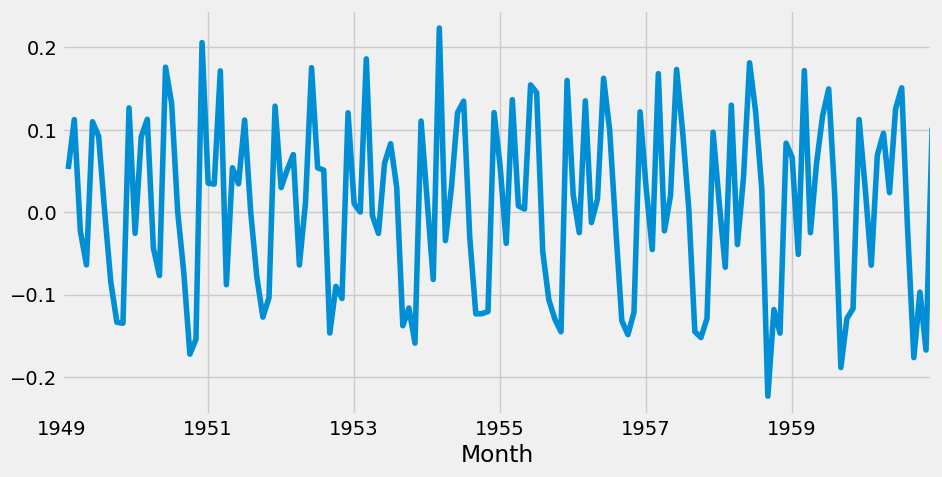

In [12]:
df["DiffLog"] = df["LogPassengers"].diff()

df["DiffLog"].plot(figsize=(10,5));

In [13]:
adf(df["DiffLog"].dropna())

Test-Statistics: -2.717130598388133
P-Value: 0.07112054815085875
Non-stationary.


In [14]:
# now time with sp500 data.

onedrive_url = "https://1drv.ms/u/s!AiqdXCxPTydhoogq5qDDaT9lYW-z0Q?e=Gbotrk"
dataset_url   = create_onedrive_directdownload(onedrive_url)
stocks          = pd.read_csv(dataset_url, index_col="Date", parse_dates=True)
stocks.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [15]:
goog = stocks.query("Name == 'GOOG'")[["Close"]]
goog.head()

,Close
Date,
2010-01-04,312.204773
2010-01-05,310.829926
2010-01-06,302.994293
2010-01-07,295.940735
2010-01-08,299.885956


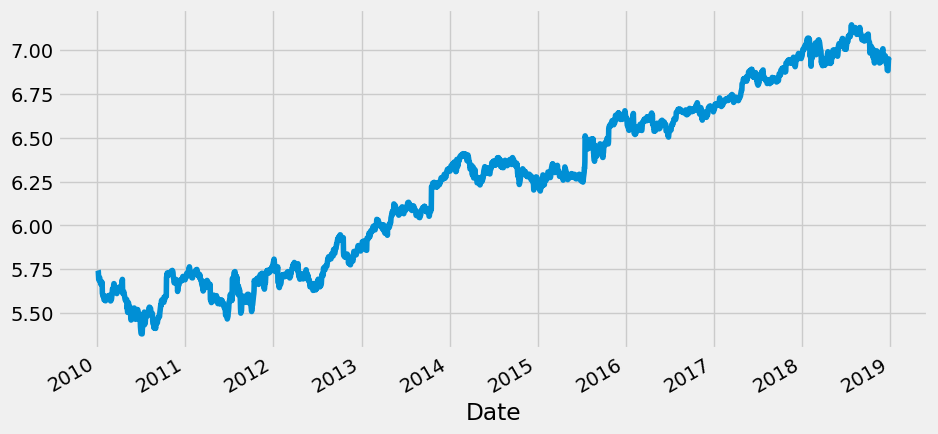

In [16]:
goog["LogPrice"] = np.log(goog["Close"])
goog["LogRet"]   = goog["LogPrice"].diff()

goog["LogPrice"].plot(figsize=(10,5));

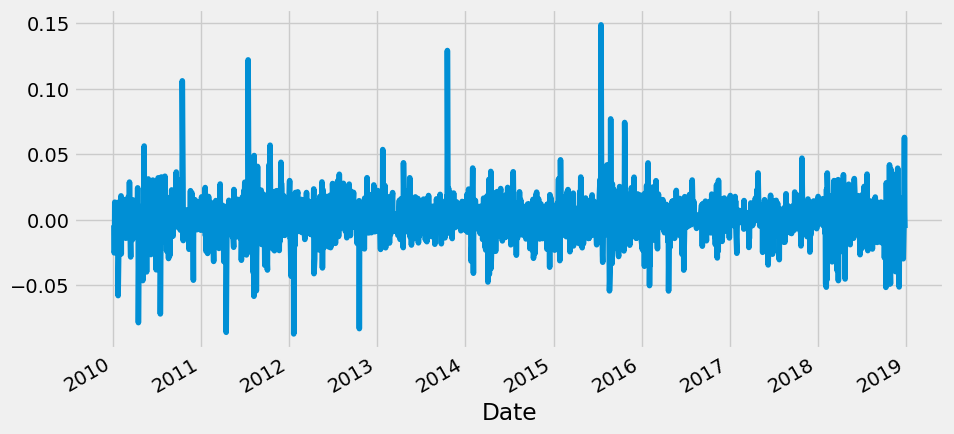

In [17]:
goog["LogRet"].plot(figsize=(10,5));

In [18]:
adf(goog["LogPrice"])

Test-Statistics: -0.4181902578906113
P-Value: 0.907017067749841
Non-stationary.


In [19]:
adf(goog["LogRet"].dropna())

Test-Statistics: -46.66748022773676
P-Value: 0.0
Stationary.


In [21]:
sbux = stocks.query("Name == 'SBUX'")[["Close"]]
sbux["LogPrice"] = np.log(sbux["Close"])
sbux["LogRet"]    = sbux["LogPrice"].diff()

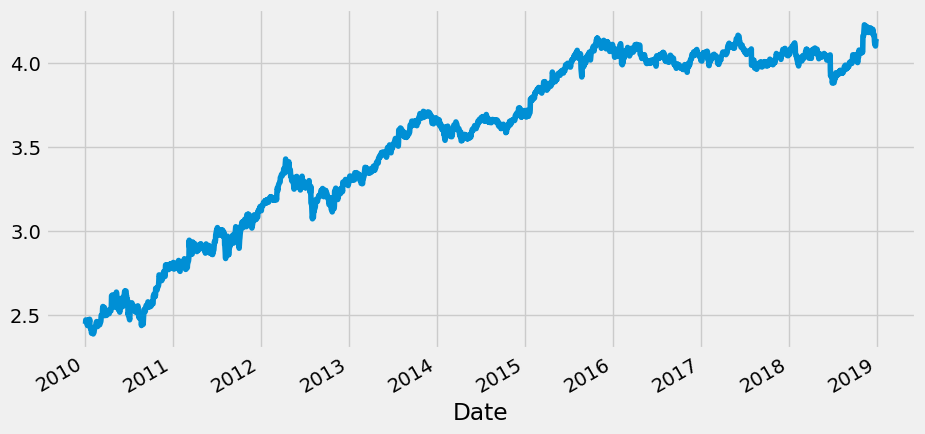

In [22]:
sbux["LogPrice"].plot(figsize=(10,5));

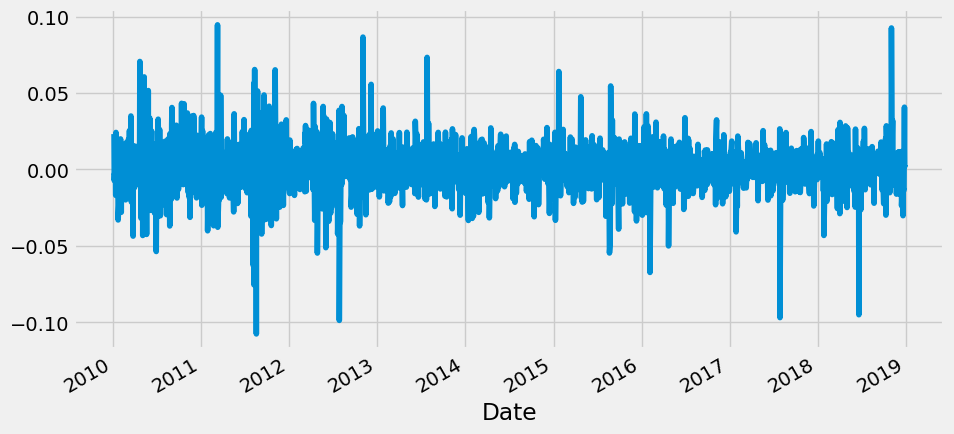

In [23]:
sbux["LogRet"].plot(figsize=(10,5));

In [24]:
adf(sbux["LogPrice"])

Test-Statistics: -1.9020133583900012
P-Value: 0.3311145569853755
Non-stationary.


In [25]:
adf(sbux["LogRet"].dropna())

Test-Statistics: -30.086501426958183
P-Value: 0.0
Stationary.
